# О датасете

В датасете (яндекс диск, (https://disk.yandex.ru/d/fgZx7hwgwHD41g) гугл драйв) (https://drive.google.com/drive/folders/1Fis0YhPGDUdTL9jZUkkHI2p-D7sVXeYW?usp=sharing) представлена информация по 10 европейским городам: отдельно по будним и выходным дням.

Наблюдения в датасете — объекты размещения на airbnb. Для каждого объекта указаны переменные:

realSum — Стоимость размещения за сутки (Numeric)

room_type — Тип комнаты или номера (Categorical)

room_shared — Есть комнаты совместного проживания (Boolean)

room_private — Есть частные комнаты (Boolean)

person_capacity — Максимальное кол-во постояльцев (Numeric)

host_is_superhost — Суперхост ли хозяин (Boolean)

multi — У хоста от 2 до 4 предложений на airbnb (Boolean)

biz — У хоста более 4 предложений на airbnb (Boolean)

cleanliness_rating — Рейтинг чистоты (Numeric)

guest_satisfaction_overall — Общий рейтинг (Numeric)

bedrooms — Количество спален (Numeric)

dist — Расстояние от центра города (Numeric)

metro_dist — Расстояние до ближайшей станции метро (Numeric)

lng — Долгота (Numeric)

lat — Широта (Numeric)

attr_index — индекс привлекательности района (Numeric)

attr_index_norm — нормализованный на интервал [0, 100] индекс привлекательности района (Numeric)

rest_index — индекс ресторанов в районе объекта (Numeric)

attr_index_norm — нормализованный на интервал [0, 100] индекс ресторанов в районе объекта (Numeric)

Задача: понять что-то важное о сервисе airbnb и/или этих городах с точки зрения одной из ролей: клиент / владелец жилья, сдающий его аренду / инвестор в гостиничный бизнес / <придумайте свой вариант>.

# Задачи и гипотезы

**1. Инвестиционная - найти наиболее инвестиционно привлекательный объект для вложений.**
---
Не хватает данных:

1.   О расходах на обслуживание

1.   Площади помещений
2.   О ценах за квадратный метр
2.   О средних зарплатах в городе (для рассчета расходов на сотрудников)

**2. Туристическая - 16 друзей (количество м.б. любое) имеют бюджет 5000 евро (так же м.б. любым), задача выбраться на выходные в максимально крутое место**: ближе к метро, ближе к достопримечательностям, рейтинг рестиков выше, выше качество уборки, трава зеленее и т.п.
---


**3. Найти фешенебельные районы в каждом городе** на основе имеющихся данных, свои Рублевки. Это м.б. далеко от достопримечательностей и метро, но аренда все равно в целом по району дорогая.
---







# Загрузка и предобработка

In [ ]:
# устанавливаем библиотеку для построения карты
!pip install folium

In [ ]:
# Устанавливаем необходимые библиотеки
from google.colab import drive
import pandas as pd
import numpy as np # Может пригодится для отладки
import folium
from geopy.distance import geodesic

In [ ]:
# Монтируем гугл-диск в основную директорию
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Получаем датафреймы из файлов
amst_wd = pd.read_csv('/content/drive/MyDrive/EDA/amsterdam_weekdays.csv')
amst_we = pd.read_csv('/content/drive/MyDrive/EDA/amsterdam_weekends.csv')
ath_wd = pd.read_csv('/content/drive/MyDrive/EDA/athens_weekdays.csv')
ath_we = pd.read_csv('/content/drive/MyDrive/EDA/athens_weekends.csv')
barc_wd = pd.read_csv('/content/drive/MyDrive/EDA/barcelona_weekdays.csv')
barc_we = pd.read_csv('/content/drive/MyDrive/EDA/barcelona_weekends.csv')
berlin_wd = pd.read_csv('/content/drive/MyDrive/EDA/berlin_weekdays.csv')
berlin_we = pd.read_csv('/content/drive/MyDrive/EDA/berlin_weekends.csv')
budap_wd = pd.read_csv('/content/drive/MyDrive/EDA/budapest_weekdays.csv')
budap_we = pd.read_csv('/content/drive/MyDrive/EDA/budapest_weekends.csv')
lisbon_wd = pd.read_csv('/content/drive/MyDrive/EDA/lisbon_weekdays.csv')
lisbon_we = pd.read_csv('/content/drive/MyDrive/EDA/lisbon_weekends.csv')
london_wd = pd.read_csv('/content/drive/MyDrive/EDA/london_weekdays.csv')
london_we = pd.read_csv('/content/drive/MyDrive/EDA/london_weekends.csv')
paris_wd = pd.read_csv('/content/drive/MyDrive/EDA/paris_weekdays.csv')
paris_we = pd.read_csv('/content/drive/MyDrive/EDA/paris_weekends.csv')
rome_wd = pd.read_csv('/content/drive/MyDrive/EDA/rome_weekdays.csv')
rome_we = pd.read_csv('/content/drive/MyDrive/EDA/rome_weekends.csv')
vienna_wd = pd.read_csv('/content/drive/MyDrive/EDA/vienna_weekdays.csv')
vienna_we = pd.read_csv('/content/drive/MyDrive/EDA/vienna_weekends.csv')


In [ ]:
# Дополняем первый датафрейм двумя столбцами "city" и булевым "weekdays"
amst_wd['city'] = 'Amsterdam'
amst_wd['weekdays'] = True
airbnb = amst_wd

In [ ]:
# Создаем функцию, которая добавляет 2 столбца weekdays(boolean) и city и присоединяет их к общему датафрейму airbnb
def days_city(data, city, weekdays):
    data['city'] = city
    data['weekdays'] = weekdays
    global airbnb
    airbnb = pd.concat([airbnb, data], ignore_index=True)


In [ ]:
# Догружаем остальные данные в airbnb
days_city(amst_we, "Amsterdam", False)
days_city(ath_wd, "Athens", True)
days_city(ath_we, "Athens", False)
days_city(barc_wd, "Barcelona", True)
days_city(barc_we, "Barcelona", False)
days_city(berlin_wd, "Berlin", True)
days_city(berlin_we, "Berlin", False)
days_city(budap_wd, "Budapest", True)
days_city(budap_we, "Budapest", False)
days_city(lisbon_wd, "Lisbon", True)
days_city(lisbon_we, "Lisbon", False)
days_city(london_wd, "London", True)
days_city(london_we, "London", False)
days_city(paris_wd, "Paris", True)
days_city(paris_we, "Paris", False)
days_city(rome_wd, "Rome", True)
days_city(rome_we, "Rome", False)
days_city(vienna_wd, "Vienna", True)
days_city(vienna_we, "Vienna", False)

In [ ]:
# Оптимизация типов данных
def set_types(dfr):
  newdf = pd.DataFrame()
  newdf['Unnamed: 0'] = dfr['Unnamed: 0'].astype('int16') # max = 5378, int16 max = 32767
  newdf['realSum'] = dfr['realSum'].astype('float32')
  newdf['room_type'] = dfr['room_type'].astype('category') # Строк много, много повторов
  newdf['room_shared'] = dfr['room_shared'] # тут уже bool, дублируем без изменений
  newdf['room_private'] = dfr['room_private'] # тут уже bool, дублируем без изменений
  newdf['person_capacity'] = dfr['person_capacity'].astype('int8') # max = 6, все числа хоть с запятой и нулём, но целые, можно поменять на int8
  newdf['host_is_superhost'] = dfr['host_is_superhost'] # тут уже bool, дублируем без изменений
  newdf['multi'] = dfr['multi'].map({'1':True, '0':False}) # В этой категории только нули и единицы
  newdf['biz'] = dfr['biz'].map({'1':True, '0':False}) # В этой категории только нули и единицы
  newdf['cleanliness_rating'] = dfr['cleanliness_rating'].astype('int8') # Тут была шкала от нуля до десяти
  newdf['guest_satisfaction_overall'] = dfr['guest_satisfaction_overall'].astype('int8') # А тут была шкала от нуля до сотни
  newdf['bedrooms'] = dfr['bedrooms'].astype('int8') # Количество спален от 0 до 10
  newdf['dist'] = dfr['dist'].astype('float32') # Расстояние от 0 до 25, числа дробные
  newdf['metro_dist'] = dfr['metro_dist'].astype('float32') # Аналогично
  newdf['attr_index'] = dfr['attr_index'].astype('float32') # Дробные числа до 4500
  newdf['attr_index_norm'] = dfr['attr_index_norm'].astype('float32') # Дробные числа до 100
  newdf['rest_index'] = dfr['rest_index'].astype('float32') # Дробные числа до 7000
  newdf['rest_index_norm'] = dfr['rest_index_norm'].astype('float32') # Дробные числа до 100
  newdf['lng'] = dfr['lng'].astype('float32') # координаты, положительные и отрицательные
  newdf['lat'] = dfr['lat'].astype('float32') # другие координаты, положительные и отрицательные
  newdf['city'] = dfr['city'].astype('category') # Строк много, много повторов
  newdf['weekdays'] = dfr['weekdays'] # тут уже bool, дублируем без изменений
  return newdf

In [ ]:
# opti_air - оптимизированный по памяти исходный датасет
# По значениям всё то же самое, можно использовать его
opti_air = set_types(airbnb)

In [ ]:
opti_air.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033691,Private room,False,True,2,False,NaN,NaN,10,...,5.022964,2.539380,78.690376,4.166708,98.253899,6.846473,4.90569,52.417721,Amsterdam,True
1,1,344.245789,Private room,False,True,4,False,NaN,NaN,8,...,0.488389,0.239404,631.176392,33.421207,837.280762,58.342926,4.90005,52.374321,Amsterdam,True
2,2,264.101410,Private room,False,True,2,False,NaN,NaN,9,...,5.748312,3.651621,75.275879,3.985908,95.386955,6.646700,4.97512,52.361031,Amsterdam,True
3,3,433.529388,Private room,False,True,4,False,NaN,NaN,9,...,0.384862,0.439876,493.272522,26.119108,875.033081,60.973564,4.89417,52.376629,Amsterdam,True
4,4,485.552917,Private room,False,True,2,True,NaN,NaN,10,...,0.544738,0.318693,552.830322,29.272734,815.305725,56.811676,4.90051,52.375080,Amsterdam,True


In [ ]:
opti_air.describe()

,Unnamed: 0,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879608,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204102,13.423791,626.856689,22.786177,7.426067,45.671127
std,1217.380366,327.948395,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754120,9.807984,497.920227,17.804096,9.799725,5.249263
min,0.000000,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152202,0.926301,19.576923,0.592757,-9.226340,37.952999
25%,646.000000,148.752167,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797386,6.380926,250.854111,8.751480,-0.072500,41.399509
50%,1334.000000,211.343094,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331741,11.468305,522.052795,17.542238,4.873000,47.506691
75%,2382.000000,319.694275,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756378,17.415082,832.628998,32.964603,13.518825,51.471884
max,5378.000000,18545.451172,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563477,100.000000,6696.156738,100.000000,23.786020,52.641411


In [ ]:
opti_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Unnamed: 0                  51707 non-null  int16   
 1   realSum                     51707 non-null  float32 
 2   room_type                   51707 non-null  category
 3   room_shared                 51707 non-null  bool    
 4   room_private                51707 non-null  bool    
 5   person_capacity             51707 non-null  int8    
 6   host_is_superhost           51707 non-null  bool    
 7   multi                       0 non-null      object  
 8   biz                         0 non-null      object  
 9   cleanliness_rating          51707 non-null  int8    
 10  guest_satisfaction_overall  51707 non-null  int8    
 11  bedrooms                    51707 non-null  int8    
 12  dist                        51707 non-null  float32 
 13  metro_dist      

In [ ]:
# выгружаю финальный оптимизированный файл
opti_air.to_csv (r'/content/drive/MyDrive/EDA/EDA_final_opt.csv', index= False )

# Анализ данных

In [ ]:
boolean_columns = airbnb.select_dtypes(include='bool').columns
print(boolean_columns)

Index(['room_shared', 'room_private', 'host_is_superhost', 'weekdays'], dtype='object')


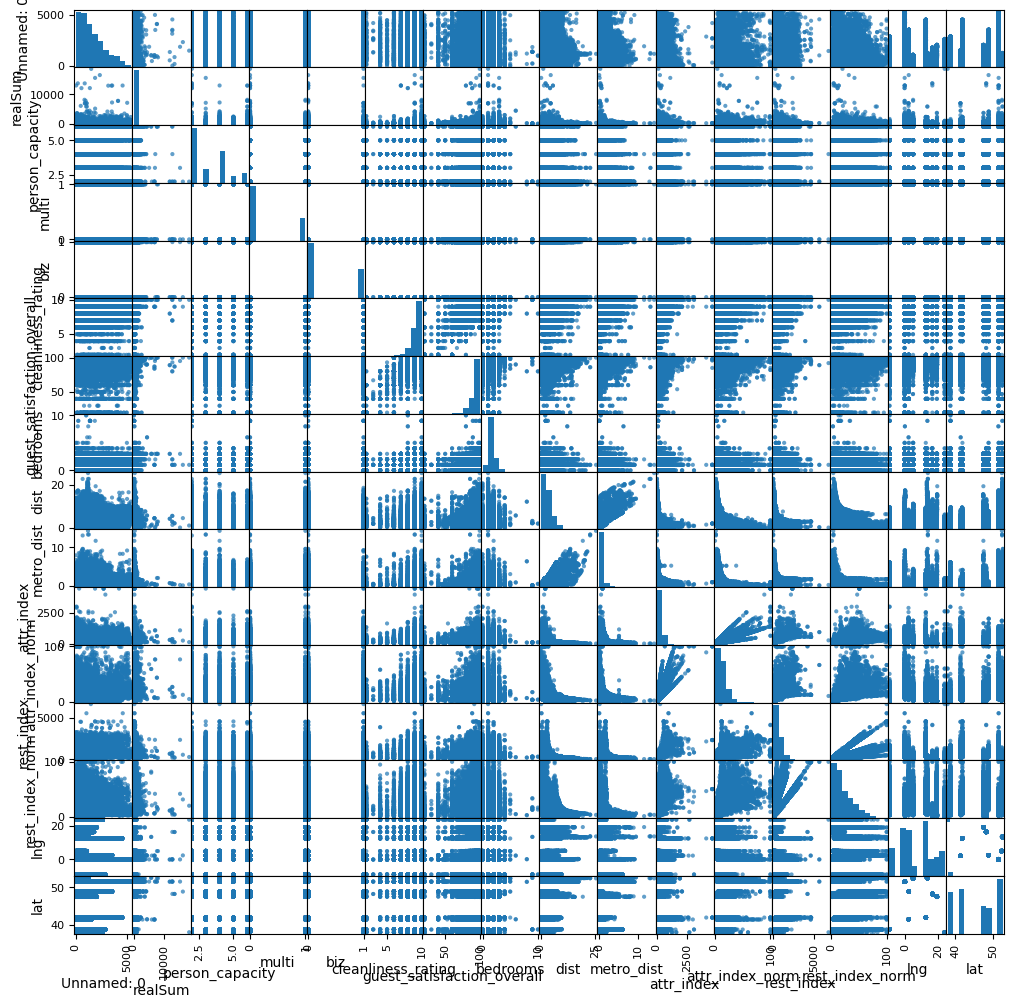

In [ ]:
airbnb_without_weekdays = airbnb.drop(columns=['room_shared', 'room_private', 'host_is_superhost', 'weekdays'])
pd.plotting.scatter_matrix(airbnb_without_weekdays, figsize=(12, 12), alpha = 0.7);

In [ ]:
import seaborn as sns

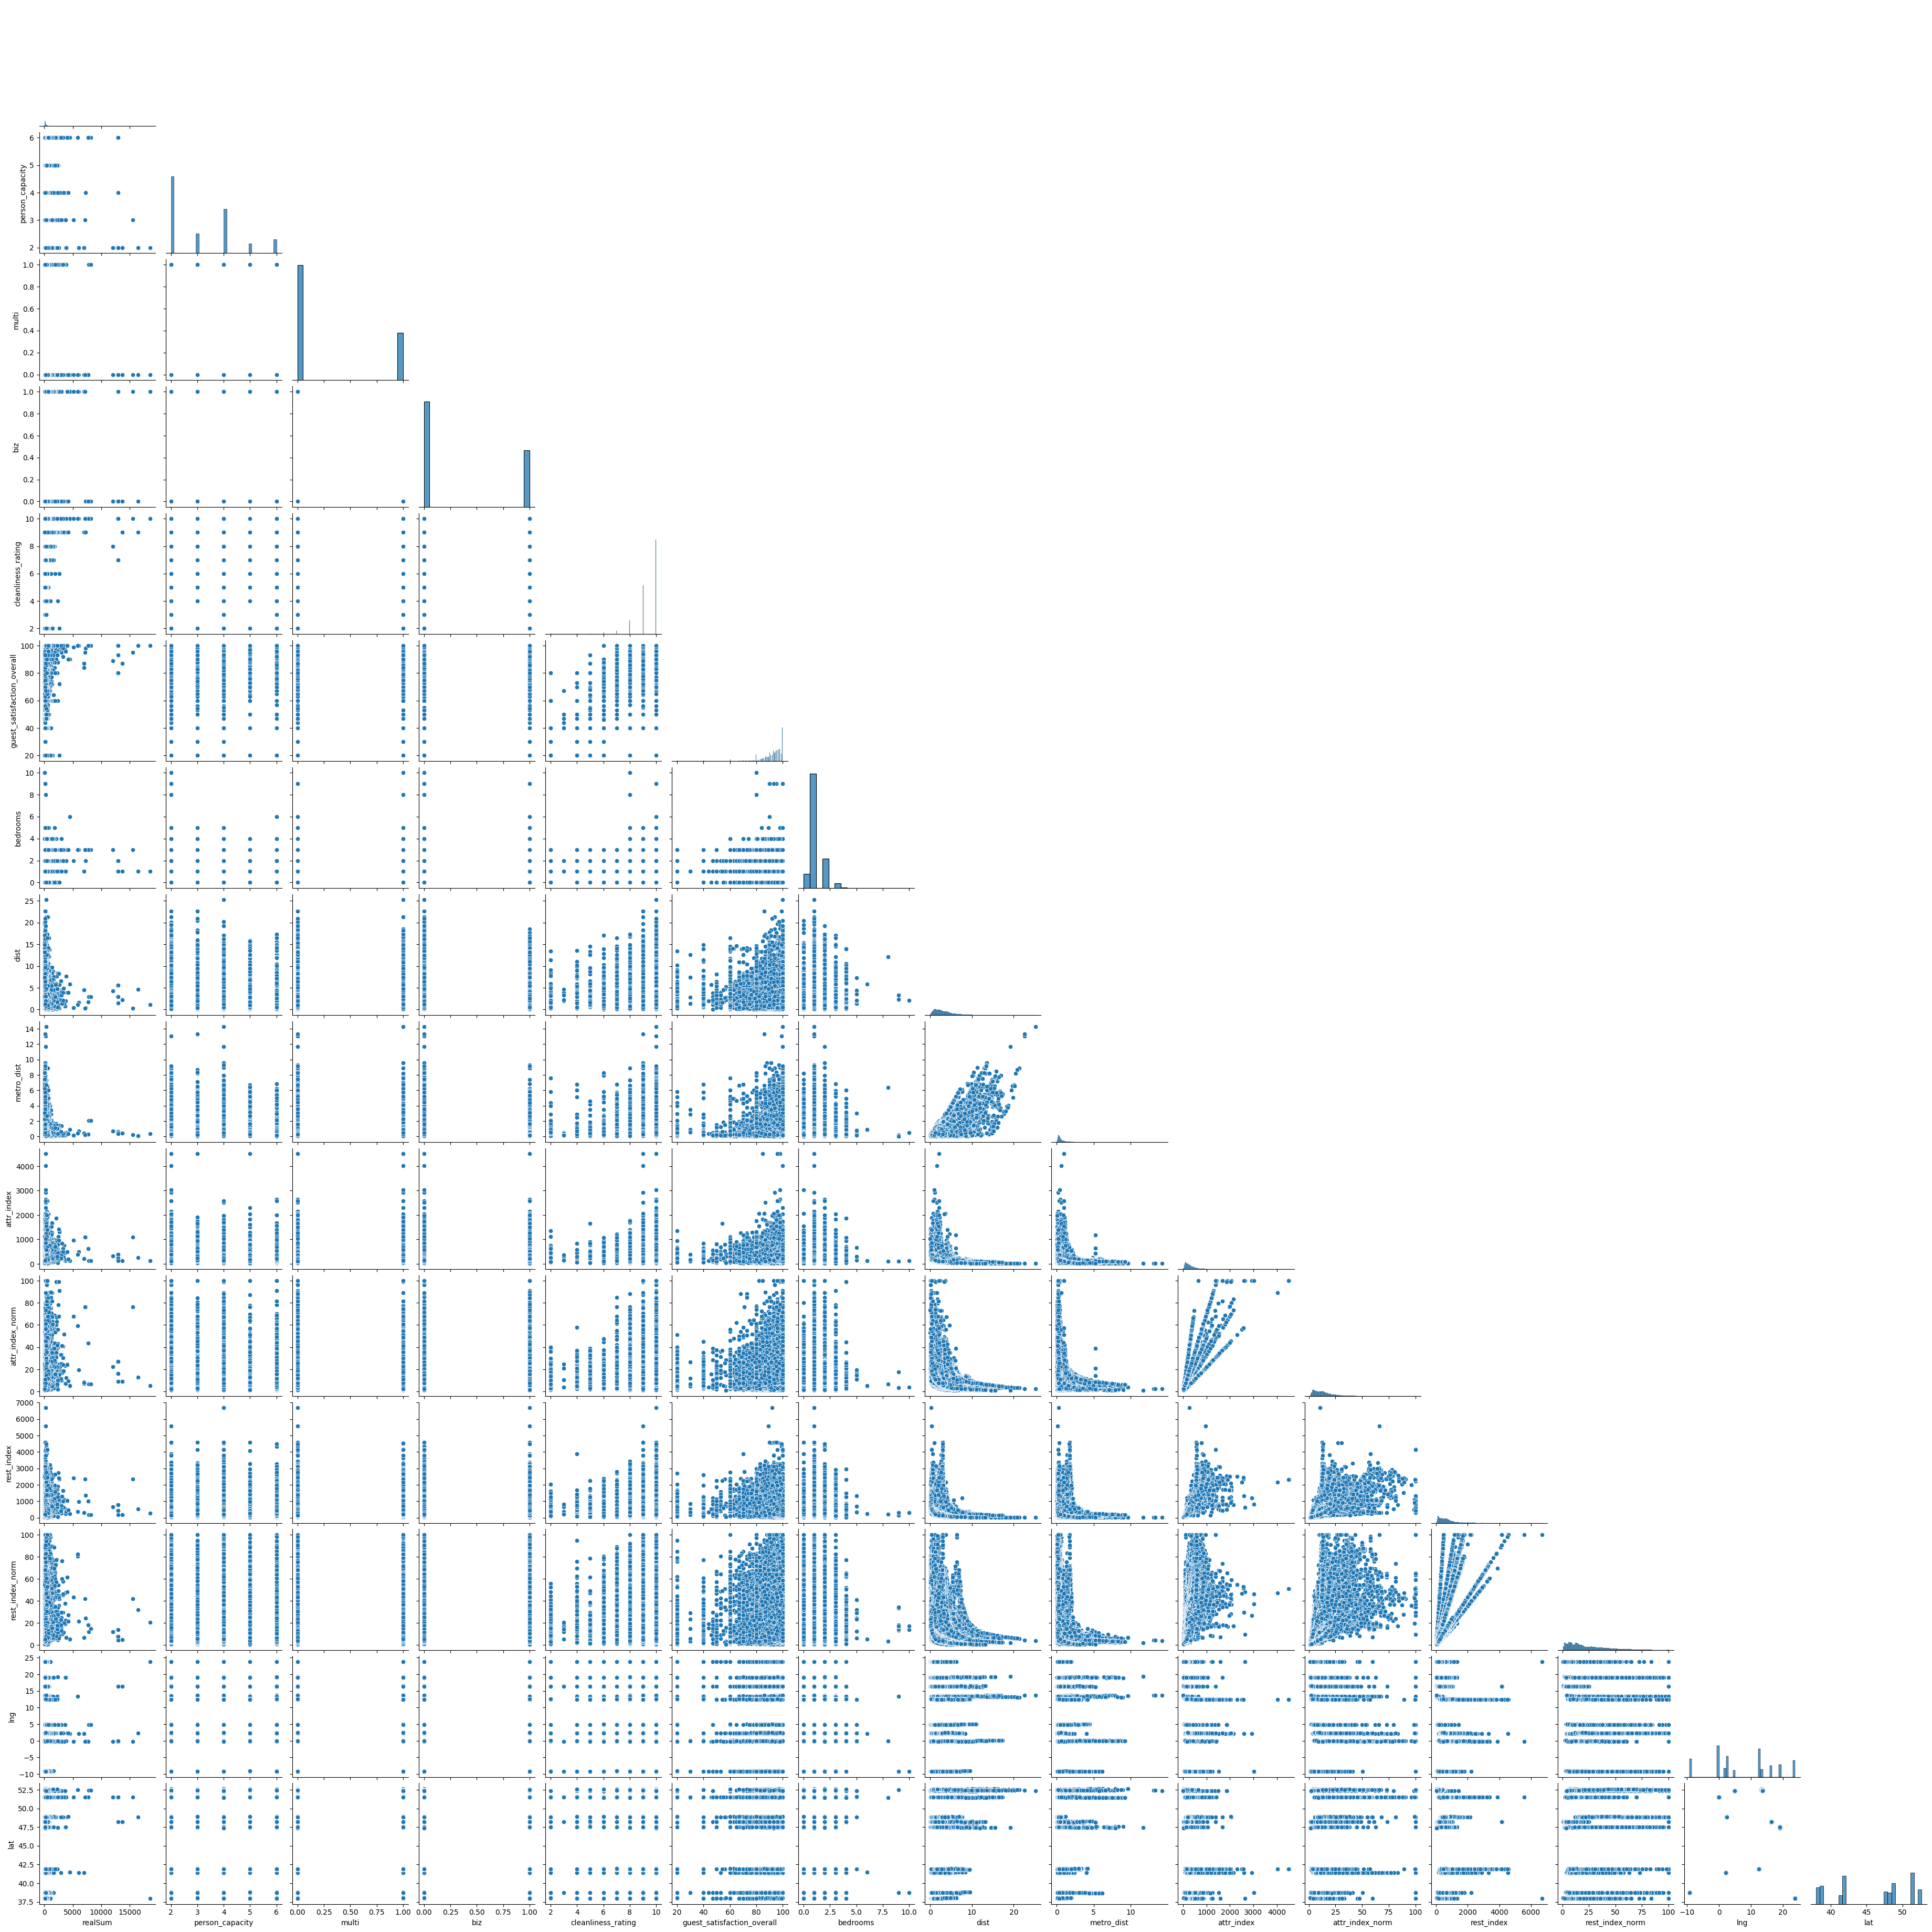

In [ ]:
sns.pairplot(airbnb[['realSum', 'person_capacity',	'multi', 'biz',	'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm',	'rest_index', 'rest_index_norm', 'lng', 'lat']], corner=True )

In [ ]:
# выгружаю финальный файл, чтобы проанализировать в Tableau
airbnb.to_csv (r'/content/drive/MyDrive/EDA/EDA_final.csv', index= False )

In [ ]:
# считаю для всех городов медианы, чтобы правильно установить границы для color coding  Табло, а то выбросы слишком сильно сдвигают их.
print(airbnb.query('city == "London"')['realSum'].median())
print(airbnb.query('city == "Amsterdam"')['realSum'].median())
print(airbnb.query('city == "Athens"')['realSum'].median())
print(airbnb.query('city == "Barcelona"')['realSum'].median())
print(airbnb.query('city == "Berlin"')['realSum'].median())
print(airbnb.query('city == "Budapest"')['realSum'].median())
print(airbnb.query('city == "Lisbon"')['realSum'].median())
print(airbnb.query('city == "Paris"')['realSum'].median())
print(airbnb.query('city == "Rome"')['realSum'].median())
print(airbnb.query('city == "Vienna"')['realSum'].median())

261.2949504927209
460.24418250415954
127.71541724275303
208.29939255707868
191.17509582125828
152.98209334022656
225.375234521576
317.5971665579271
182.59182194374955
208.49402800177643


In [ ]:
# глядя на график (distr - rest), кажется, что при некоторой удаленности от центра, стоимость сдачи не так значително падает, как после. возможно, это связано
# с привлекательностью района или ресторанов рядом. найдем этот критический момент
# для каждого города это значние явно разное
# создаю дата фреймы для каждого города отдельно
opti_air_Lond = opti_air.query('city == "London"')
opti_air_Amst = opti_air.query('city == "Amsterdam"')
opti_air_Ath = opti_air.query('city == "Athens"')
opti_air_Barc = opti_air.query('city == "Barcelona"')
opti_air_Berl = opti_air.query('city == "Berlin"')
opti_air_Bud = opti_air.query('city == "Budapest"')
opti_air_Lisb = opti_air.query('city == "Lisbon"')
opti_air_Par = opti_air.query('city == "Paris"')
opti_air_Rome = opti_air.query('city == "Rome"')
opti_air_Vien = opti_air.query('city == "Vienna"')

In [ ]:
# Amst : 3 km, строим линейную регрессию по стоимости здачи от удаленности от центра
#
x=opti_air_Amst['dist']
y=opti_air_Amst['realSum']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = -54.222350204216156*x + 726.2937272461731


In [ ]:
# до 3 км
x=opti_air_Amst.query('dist < 3')['dist']
y=opti_air_Amst.query('dist < 3')['realSum']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = -53.92330128559501*x + 743.6790450819534


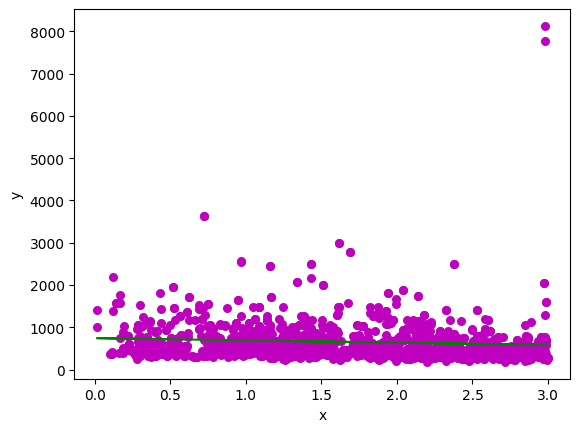

In [ ]:
import matplotlib.pyplot as plt
# нарисуем данные
plt.scatter(x, y, color = "m", marker = "o", s = 30)

# вектор прогнозируемых значений
y_pred = b + k * x

# нарисуем линию регрессии
plt.plot(x, y_pred, color = "g")

# подписи
plt.xlabel('x')
plt.ylabel('y')

# покажем график
plt.show()

In [ ]:
# после 3км
x=opti_air_Amst.query('dist > 3')['dist']
y=opti_air_Amst.query('dist > 3')['realSum']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = -27.414446932857242*x + 562.0589680231333


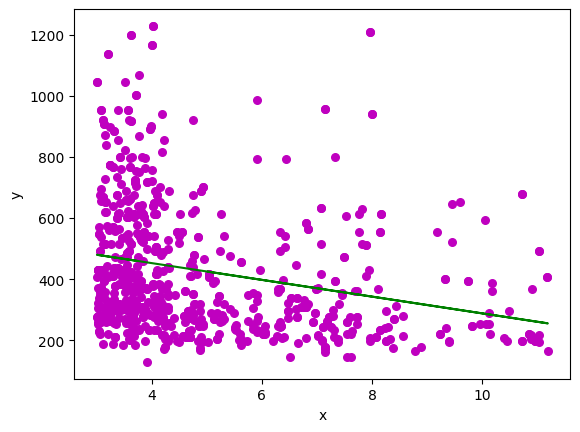

In [ ]:
import matplotlib.pyplot as plt
# нарисуем данные
plt.scatter(x, y, color = "m", marker = "o", s = 30)

# вектор прогнозируемых значений
y_pred = b + k * x

# нарисуем линию регрессии
plt.plot(x, y_pred, color = "g")

# подписи
plt.xlabel('x')
plt.ylabel('y')

# покажем график
plt.show()


In [ ]:
# НЕ ПОДТВЕРДИЛОСЬ: видим, что с порогом в 3 км стоимость, наоборот, падает более медленно, а до 3км - более драматично. каждый км уменьшает стоимость сдачи на 53,а далее - только на 27
# получается, выгодней размещать дальше от центра, при условии, что цена медленно падает

In [ ]:
# проверим зависимость ресторанный рейтинг - стоимость сдачи:
x=opti_air_Amst['rest_index']
y=opti_air_Amst['realSum']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')
# но коэффициент корреляции низкий, линейной зависимости там почти нет, нет смысла на это опираться

линейная регрессия: y = 0.43502573633136077*x + 427.0690853564755


In [ ]:
# единственный приличный коэффициент корреляции с realSum - у attr_index_norm
x=opti_air['attr_index_norm']
y=opti_air['realSum']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = 9.776806829411388*x + 148.63779729664543


# Посмотрим графики

<Axes: title={'center': 'realSum'}, xlabel='city'>

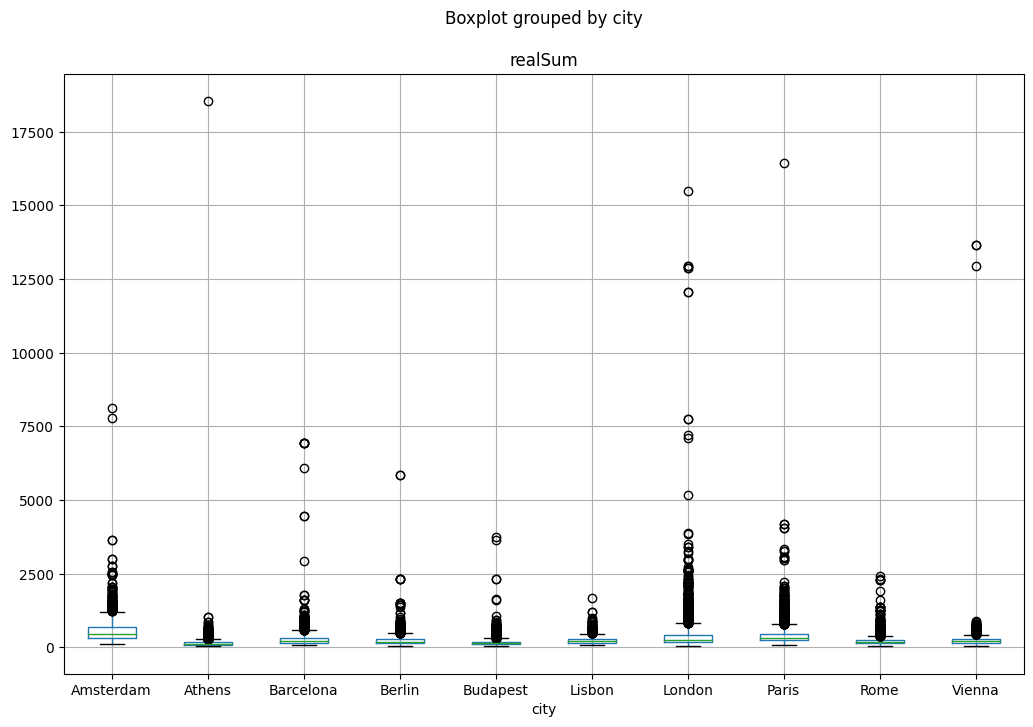

In [ ]:
#Выведем боксплоты и посмотрим выбросы для всех городов
airbnb.boxplot(column = ['realSum'], figsize=(12,8), whis=1.5, by="city")
#Откинуть выбросы и поисследовать без них

<Axes: >

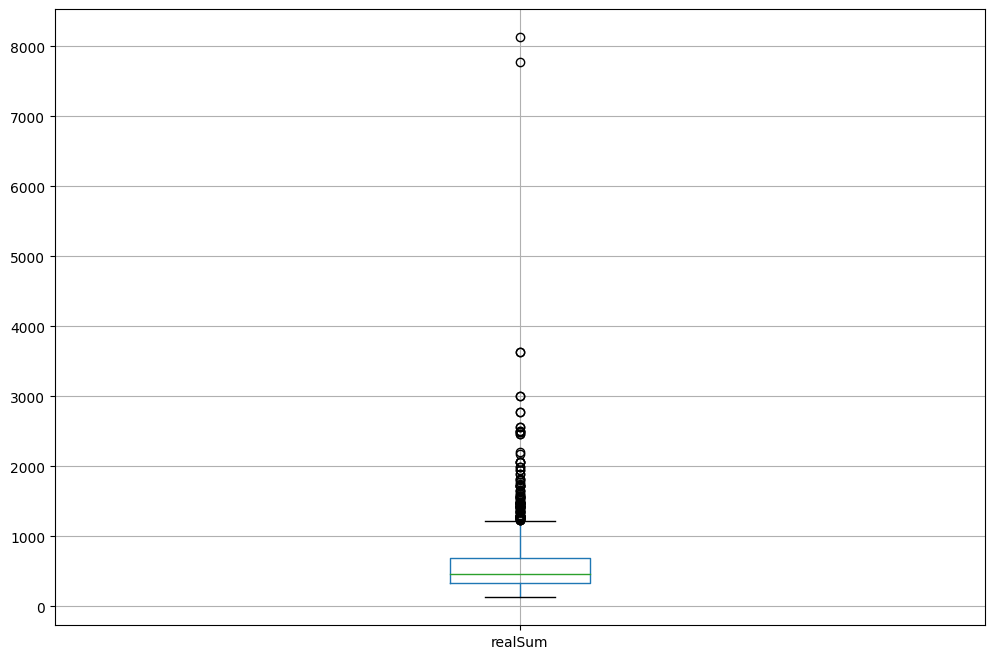

In [ ]:
airbnb.query('city == "Amsterdam"').boxplot(column = ['realSum'], figsize=(12,8), whis=1.5)

In [ ]:
!pip install typing-extensions==4.6.0
!pip install ydata-profiling

In [ ]:
import pandas as pd

In [ ]:
from ydata_profiling import ProfileReport

# reading table for primary analysis
df = pd.read_csv('/content/drive/MyDrive/EDA/EDA_final_opt.csv')

# forming the report
profile = ProfileReport(df, title="EDA_Pandas Profiling Report")
# moving the report into html file
profile.to_file("EDA_report.html")

# Задача 2

In [ ]:
opti_air = pd.read_csv('/content/drive/MyDrive/EDA/EDA_final_opt.csv')

In [ ]:
opti_air.head(10)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.03369,Private room,False,True,2,False,NaN,NaN,10,...,5.022964,2.539380,78.690380,4.166708,98.253900,6.846473,4.90569,52.41772,Amsterdam,True
1,1,344.24580,Private room,False,True,4,False,NaN,NaN,8,...,0.488389,0.239404,631.176400,33.421207,837.280760,58.342926,4.90005,52.37432,Amsterdam,True
2,2,264.10140,Private room,False,True,2,False,NaN,NaN,9,...,5.748312,3.651621,75.275880,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,True
3,3,433.52940,Private room,False,True,4,False,NaN,NaN,9,...,0.384862,0.439876,493.272520,26.119108,875.033100,60.973564,4.89417,52.37663,Amsterdam,True
4,4,485.55292,Private room,False,True,2,True,NaN,NaN,10,...,0.544738,0.318693,552.830300,29.272734,815.305700,56.811676,4.90051,52.37508,Amsterdam,True
5,5,552.80860,Private room,False,True,3,False,NaN,NaN,8,...,2.131420,1.904668,174.788960,9.255192,225.201660,15.692376,4.87699,52.38966,Amsterdam,True
6,6,215.12431,Private room,False,True,2,False,NaN,NaN,10,...,1.881092,0.729747,200.167650,10.599010,242.765520,16.916250,4.91570,52.38296,Amsterdam,True
7,7,2771.30740,Entire home/apt,False,False,4,True,NaN,NaN,10,...,1.686807,1.458404,208.808100,11.056528,272.313800,18.975220,4.88467,52.38749,Amsterdam,True
8,8,1001.80444,Entire home/apt,False,False,4,False,NaN,NaN,9,...,3.719142,1.196112,106.226456,5.624762,133.876200,9.328687,4.86459,52.40175,Amsterdam,True
9,9,276.52145,Private room,False,True,2,False,NaN,NaN,10,...,3.142361,0.924404,206.252870,10.921226,238.291260,16.604477,4.87600,52.34700,Amsterdam,True


In [ ]:
Данные о средней стоимости метра жилья:

In [ ]:
# обоснование выбора города Барселона для поездки
# регрессия для Лондона
x=opti_air_Lond['rest_index_norm']
y=opti_air_Lond['attr_index_norm']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = 1.546627749337734*x + 3.162420157259337


In [ ]:
# обоснование выбора города Барселона для поездки
# регрессия для Лиссабона
x=opti_air_Lisb['rest_index_norm']
y=opti_air_Lisb['attr_index_norm']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = 0.2127945267911352*x + 1.3081600516339522


In [ ]:
# обоснование выбора города Барселона для поездки
# регрессия для Барселоны
x=opti_air_Barc['rest_index_norm']
y=opti_air_Barc['attr_index_norm']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
k = SS_xy / SS_xx
b = m_y - k * m_x
print(f'линейная регрессия: y = {k}*x + {b}')

линейная регрессия: y = 0.6672756160413387*x + 3.7067345093428603


# Решение задачи 2 (про нескольких друзей)

In [ ]:
opti_air = pd.read_csv('/content/drive/MyDrive/EDA/EDA_final_opt.csv')

In [ ]:
opti_air.describe()

In [ ]:
opti_air.keys()

In [ ]:
def rec_placement(data, count_persons, count_days, budget, weekdays, dist):
    global the_best
    global best_city
    global budget_airbnb
    global budget_airbnb_city

    # Рассчитываем максимальную стоимость размещения на человека в день
    max_cost_per_person = budget / count_persons / count_days

    # Рассчитываем стоимость размещения на человека в день по каждому предложению
    data['cost_per_person'] = data['realSum'] / data['person_capacity']

    # Отбрасываем предложения выходного дня и то, что не можем позволить по бюджету
    budget_airbnb = data.query(f'weekdays == {weekdays} and cost_per_person <= {max_cost_per_person}')

    # Рассчитываем максимальные значения для нормализации
    max_cost = budget_airbnb['cost_per_person'].max()
    max_dist = budget_airbnb['dist'].max()
    max_metro_dist = budget_airbnb['metro_dist'].max()

    # Высчитываем индекс идеального соотношения цена-качество (от -1 до 1)
    budget_airbnb['cost_quality_index'] = (
        - 0.4 * (budget_airbnb['cost_per_person'] / max_cost)
        + 0.4 * (budget_airbnb['guest_satisfaction_overall'] / 100)
        - 0.4 * (budget_airbnb['dist'] / max_dist)
        - 0.2 * (budget_airbnb['metro_dist'] / max_metro_dist)
        + 0.4 * (budget_airbnb['attr_index_norm'] / 100)
        + 0.2 * (budget_airbnb['rest_index_norm'] / 100)
    )

    budget_airbnb = budget_airbnb.sort_values(by='cost_quality_index', ascending=False)

    # Находим лучшее предложение и город лучшего предложения
    the_best = budget_airbnb.iloc[0]
    best_city = the_best.loc["city"]
    print(f'Рекомендуем вам размещение в городе {best_city}')

    # Координаты "лучшей точки"
    start_lat = the_best.loc['lat']
    start_lng = the_best.loc['lng']
    start_point = (start_lat, start_lng)

    # Функция для расчета расстояния между двумя точками
    def calculate_distance(row):
        point = (row['lat'], row['lng'])
        return geodesic(start_point, point).meters

    # Применение функции к каждой строке датафрейма и создание нового столбца 'distance'
    budget_airbnb['distance'] = budget_airbnb.apply(calculate_distance, axis=1)

    # Формируем список точек в "лучшем" городе в пределах {distance} метров от точки с наивысшим рейтингом
    budget_airbnb_city = budget_airbnb.query(f'city == "{best_city}" and distance <= {dist}')

    budget_airbnb.index = np.arange(0, len(budget_airbnb))
    budget_airbnb_city.index = np.arange(0, len(budget_airbnb_city))
    #return the_best
    #return budget_airbnb
    return budget_airbnb_city
    #the_best = budget_airbnb.head(10)
    #return budget_airbnb.iloc[0]

In [ ]:
rec_placement(opti_air, 15, 5, 10_000, True, 300)

<ipython-input-39-2f4073b52451>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_airbnb['cost_quality_index'] = (


Рекомендуем вам размещение в городе Athens


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays,cost_per_person,cost_quality_index,distance
0,330,265.27313,Entire home/apt,False,False,6,True,NaN,NaN,10,...,100.000000,640.80010,48.115173,23.72860,37.96854,Athens,True,44.212188,0.730988,0.000000
1,61,159.11700,Entire home/apt,False,False,3,False,NaN,NaN,9,...,59.959550,485.80750,36.477383,23.72822,37.96839,Athens,True,53.039000,0.504880,37.311333
2,2537,162.39777,Entire home/apt,False,False,4,True,NaN,NaN,10,...,45.626835,359.56270,26.998158,23.72646,37.96971,Athens,True,40.599443,0.479990,228.525932
3,58,150.68076,Entire home/apt,False,False,3,True,NaN,NaN,10,...,30.198381,673.01970,50.534416,23.72900,37.96800,Athens,True,50.226920,0.446670,69.483284
4,1313,243.24515,Entire home/apt,False,False,6,False,NaN,NaN,10,...,31.188745,454.56778,34.131714,23.72791,37.96876,Athens,True,40.540858,0.442371,65.362925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2643,429.07693,Entire home/apt,False,False,4,True,NaN,NaN,10,...,18.781685,348.40630,26.160465,23.72570,37.96976,Athens,True,107.269233,0.177894,288.566910
117,1175,134.04260,Entire home/apt,False,False,2,False,NaN,NaN,8,...,15.458122,354.97560,26.653727,23.72681,37.96750,Athens,True,67.021300,0.168360,195.102612
118,991,707.00446,Entire home/apt,False,False,6,False,NaN,NaN,10,...,16.921350,435.82333,32.724270,23.73000,37.97000,Athens,True,117.834077,0.155647,203.456677
119,2652,241.13608,Entire home/apt,False,False,2,True,NaN,NaN,10,...,22.886166,390.01807,29.284930,23.72732,37.96924,Athens,True,120.568040,0.154793,136.700492


In [ ]:
def checkin(data, budget, count_persons):
    global new_df
    new_df = pd.DataFrame()
# Cразу проверка на количество свободных мест, чтобы дальше не считать
    if count_persons > sum(data["person_capacity"]):
        print("Невозможно расселить всех, измените критерии подбора жилья")

    for row in range(len(data)):
        if data.loc[row, "person_capacity"] <= count_persons and \
        data.loc[row, "realSum"] <= budget:
            count_persons -= data.loc[row, "person_capacity"]
            budget -= data.loc[row, "realSum"]
            new_df = pd.concat([new_df, data.loc[row].to_frame().T], ignore_index=True)
        else:
            continue

    # Создать карту
    map = folium.Map(location=[the_best.loc['lat'], the_best.loc['lng']], zoom_start=17, tiles='http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', attr='OpenStreetMap')  # Укажите начальные координаты и уровень масштабирования
    # Добавить маркеры на карту
    for index, row in new_df.iterrows():
        folium.Marker([row['lat'], row['lng']], popup=row['Unnamed: 0']).add_to(map)

    if count_persons != 0:
        print("Расселить такое количество человек не получилось")

    else:
        print(f'у вас осталось {budget:.2f}')

        # Отобразить карту
        return map

In [ ]:
checkin(budget_airbnb_city, 10_000, 15)

у вас осталось 9334.24


In [ ]:
new_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays,cost_per_person,cost_quality_index,distance
0,330,265.27313,Entire home/apt,False,False,6,True,NaN,NaN,10,...,100.0,640.8001,48.115173,23.7286,37.96854,Athens,True,44.212188,0.730988,0.0
1,61,159.117,Entire home/apt,False,False,3,False,NaN,NaN,9,...,59.95955,485.8075,36.477383,23.72822,37.96839,Athens,True,53.039,0.50488,37.311333
2,2537,162.39777,Entire home/apt,False,False,4,True,NaN,NaN,10,...,45.626835,359.5627,26.998158,23.72646,37.96971,Athens,True,40.599443,0.47999,228.525932
3,2338,78.97266,Private room,False,True,2,False,NaN,NaN,10,...,11.510319,336.96243,25.30119,23.72775,37.96613,Athens,True,39.48633,0.353065,277.731813


# Дополнительные построения

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=opti_air[['city', 'realSum']], x='city', y='realSum');
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=opti_air[['city', 'realSum']], x='city', y='realSum');
plt.show()

In [ ]:
# функция для расчета расстояния между объектами. lat_target, lng_target - это координаты места, до которого мы ищем расстояние
def haversine(row, lat_target, lng_target):
    curr_lat = float(row['lat'])
    curr_lng = float(row['lng'])
    lon1, lat1, lon2, lat2 = map(radians, [lng_target, lat_target, curr_lng, curr_lat])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    dist = 6371000 * c
    return dist


In [ ]:
# вызов функции. opti_air_Lond - дата фрейм по городу Лондон, можно передать любой другой.
opti_air_Lond['dist_to_target'] = opti_air_Lond.apply(lambda row: haversine(row, 51.509949, -0.13038), axis=1)

In [ ]:
"""
Алгоритм:
а) Выбор факторов и обоснование.
1.	Стоимость размещения (realSum):
Обоснование: Стоимость размещения напрямую влияет на бюджет студентов. Высокие затраты могут быть неприемлемыми для них, поэтому этот фактор критически важен.
2.	Рейтинг чистоты (cleanliness_rating):
Обоснование: Студенты, возможно, предпочли бы размещение с высоким рейтингом чистоты, чтобы обеспечить комфортные и гигиеничные условия.
3.	Расстояние от центра города (dist):
Обоснование: Близость к центру города может быть важным фактором, упрощающим доступ к основным туристическим местам и экономящим время и деньги на транспорте.
4.	Расстояние до ближайшей станции метро (metro_dist):
Обоснование: Близость к метро обеспечит удобство передвижения по городу, что может быть важно для студентов, стремящихся максимизировать свое время и минимизировать затраты на транспорт.
5.	Общий рейтинг (guest_satisfaction_overall):
Обоснование: Общий рейтинг может дать общую картину уровня удовлетворенности предыдущих постояльцев. Этот фактор может быть важен для студентов, ищущих надежные варианты размещения.
6.	Количество спален (bedrooms):
Обоснование: В зависимости от размера группы студентов, количество спален может быть важным фактором. Например, если это группа из 10 человек, они, возможно, предпочли бы размещение с несколькими спальнями.
7.	Индекс привлекательности района (attr_index_norm):
Обоснование: Уровень привлекательности района может влиять на общее впечатление от поездки. Высокий индекс привлекательности может сделать пребывание более приятным.
8.	Индекс ресторанов в районе объекта (rest_index_norm):
Обоснование: Для студентов, желающих насладиться местной кухней, индекс ресторанов в районе может быть важным фактором.

b) Построение матрицы корреляции Phi_K

с) Коэффициент Phi_K между guest_satisfaction_overall и другими переменными.
Переменная "guest_satisfaction_overall" может служить индикатором удовлетворенности гостей в различных аспектах поездки. Если группа выбирает поездку с ограниченным бюджетом, уровень удовлетворенности гостей может отражать,
насколько им удалось получить удовольствие от поездки с учетом финансовых ограничений. Предполагается, что переменные, связанные с бюджетом (расходы на услуги, транспорт, проживание, питание),
могут влиять на общую удовлетворенность гостей. Таким образом, "guest_satisfaction_overall" может измерять, насколько успешно группа справилась с ограниченным бюджетом и как это сказалось на их удовлетворенности.

d) Выбор переменных по результатам и рассчета весов для создания линейной комбинации факторов. Формула:
guest_satisfaction_overall = 0.53 * cleanliness_rating + 0.36 * host_is_superhost + 0.06 * rest_index + 0.05 * dist

In [ ]:
pip install phik

In [ ]:
import pandas as pd
import phik

df = pd.read_csv("/content/drive/MyDrive/EDA/EDA_final_opt.csv")

# Вычислим коэффициент Phi_K корреляции со всеми переменными
phi_k_matrix = df.phik_matrix()


print(phi_k_matrix)

# 0.00 - 0.19: Очень слабая или отсутствующая корреляция.
# 0.20 - 0.39: Слабая корреляция.
# 0.40 - 0.59: Умеренная корреляция.
# 0.60 - 0.79: Значительная корреляция.
# 0.80 - 1.00: Высокая корреляция

In [ ]:
import pandas as pd
import phik

df = pd.read_csv("/content/drive/MyDrive/EDA/EDA_final_opt.csv")

# Вычислим Phi_K корреляцию между guest_satisfaction_overall и всеми остальными переменными
phi_k_correlations = df.phik_matrix()['guest_satisfaction_overall']


print(phi_k_correlations)

In [ ]:
# выбрали определенные переменные
# заданные коэффициенты Phi_K
cleanliness_rating = 0.698187
host_is_superhost = 0.477318
rest_index = 0.076426
dist = 0.072594
# расчет нормализованных весов
total_phi_k = cleanliness_rating + host_is_superhost + rest_index + dist

weight_cleanliness_rating = round(cleanliness_rating / total_phi_k, 2)
weight_host_is_superhost = round(host_is_superhost / total_phi_k, 2)
weight_rest_index = round(rest_index / total_phi_k, 2)
weight_dist = round(dist / total_phi_k, 2)

# jбщая формула с весами
f_with_weights = (
    f"guest_satisfaction_overall = "
    f"{weight_cleanliness_rating} * cleanliness_rating + "
    f"{weight_host_is_superhost} * host_is_superhost + "
    f"{weight_rest_index} * rest_index + "
    f"{weight_dist} * dist"
)
print(f_with_weights)